In [12]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_6484\1615888297.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv("OU-process-mean-velocity.txt", delim_whitespace=True, header=None,encoding="utf-16")


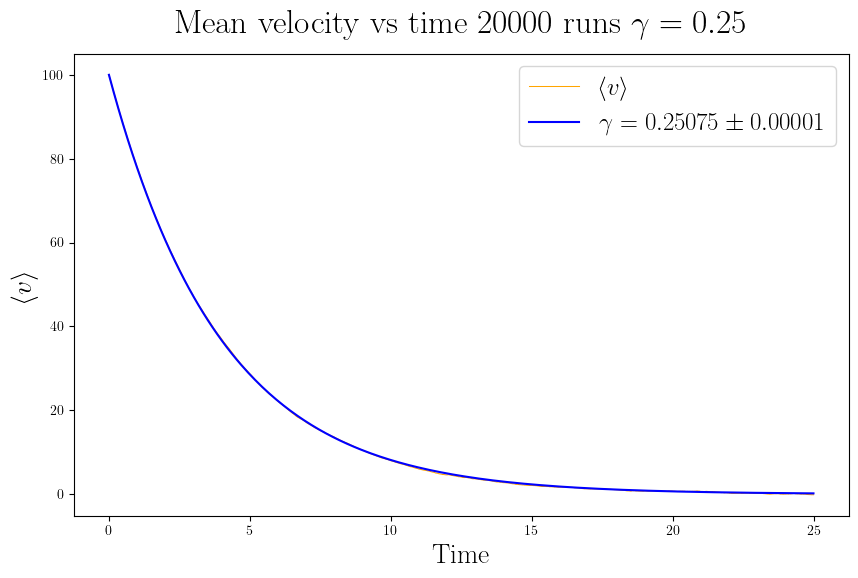

In [24]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# 1) LOAD DATA ---------------------

data=pd.read_csv("OU-process-mean-velocity.txt", delim_whitespace=True, header=None,encoding="utf-16")
# Assign column names for clarity
data.columns = ['Time', 'mean-vel']

# 2) DEFINE THE OU STD FUNCTION
# -------------------------------
def ou_mean_vel_func(t, B):
    return 100* np.exp(- B * t)

# 3) CURVE FIT TO EXTRACT A & B
# -------------------------------
t_data = data['Time'].values
vel_data = data['mean-vel'].values

# A good initial guess:
#   - A ~ the final std value (because at large t, sigma_v(t)-> A)
#   - B ~ 1 or something modest
p0 = [1.0]

# Perform nonlinear least-squares fitting
popt, pcov = curve_fit(ou_mean_vel_func, t_data, vel_data, p0=p0)
B_fit = popt

# Extract uncertainties from diagonal of covariance matrix
B_err = np.sqrt(np.diag(pcov))

# If you know the mass (in your simulation units), say m=1.0 or something else:
gamma_fit = B_fit
gamma_err = B_err

# -------------------------------
# 4) PLOT THE FIT CURVE
# -------------------------------
t_fit = np.linspace(t_data.min(), t_data.max(), 300)
vel_fit = ou_mean_vel_func(t_fit, B_fit)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['mean-vel'], label=rf'$\langle v \rangle$',color='orange', linewidth=0.75)
plt.plot(t_fit, vel_fit, color='blue',label = rf'$\gamma = {gamma_fit[0]:.5f}\pm{gamma_err[0]:.5f}$')
# Adding labels, title, and legend
plt.title(r' Mean velocity vs time $20000$ runs $\gamma = 0.25$ ', fontsize=24, pad=15)
plt.xlabel(r'Time', fontsize=20)
plt.ylabel(rf'$\langle v \rangle$', fontsize=20)
plt.legend(fontsize=18)
# Display the plot
#plt.show()
plt.savefig('OU-process-mean-velocity.pdf',format='pdf')

